# The Elements of Statistical Learning - Chapter 5 Exercises

## Exercise 5.1

Show that the truncated power basis functions in (5.3) represent a basis for a cubic spline with the two knots as indicated.

### Solution

Recall that

\begin{align}
    h_1(X) = 1,\qquad h_3(X) = X^2, \qquad h_5(X) = (X-\xi_1)^3 \\
    h_2(X) = X,\qquad h_4(X) = X^3, \qquad h_6(X) = (X-\xi_2)^3.
\end{align}

First note that each of these has continuity up to the second derivative so any linear combination of them does also. Moreover they are linearly independent: if $\sum_{m=1}^6 \beta_m h_m(X)\equiv 0$ then $\sum_{m=1}^4 \beta_m h_m(X)\equiv 0$ for $X<\xi_1$ so $\beta_1=\beta_2=\beta_3=\beta_4=0$, so $\beta_5 h_5(X)\equiv 0$ for $X < \xi_2$ implying $\beta_5=0$, so $\beta_6 h_6(X)\equiv 0$ and thus all $\beta_m=0$.

It remains to show that the $h_m(X)$ span the space of cubic splines with knots $\xi_1$ and $\xi_2$. We establish this via the following claim. 

**Claim:** Suppose that $f^{(1)}(X)$ and $f^{(2)}(X)$ are cubics and

\begin{equation}
    f(X) =
        \begin{cases}
            f^{(1)}(X) & \text{if } X < \xi_1 \\
            f^{(2)}(X) & \text{if } X \geq \xi_1
        \end{cases}
\end{equation}

is continuous up to its second derivative. Then there exists $\beta\in\mathbb{R}$ such that

\begin{equation}
    f^{(2)}(X) \equiv f^{(1)}(X) + \beta(X - \xi)^3.
\end{equation}

for $X \geq \xi$.

Spanning follows from this: if $f(X)$ is a cubic spline with $f(X)=f^{(1)}(X)$ for $X<\xi_1$, $f(X)=f^{(2)}(X)$ for $\xi_1\leq X<\xi_2$, and $f(X)=f^{(3)}(X)$ for $\xi_2\leq X<$ then $f^{(1)}$ can be written as a linear combination of $h_1,\ldots,h_4$ and then claim shows that adding in suitable multiples of $h_5$ and $h_6$ yields a function that equals $f^{(2)}$ and $f^{(3)}$ on their domains.

**Proof of Claim:** To establish this, write

\begin{equation}
    f^{(i)}(X) = \sum_{m=0}^3 \alpha_m^{(i)} (X - \xi)^m
\end{equation}

for $i=1, 2$. Then

\begin{align}
    f^{(1)}(\xi) = f^{(2)}(\xi)
        \qquad & \Rightarrow \qquad  \alpha_0^{(1)}=\alpha_0^{(2)} \\
    (f^{(1)})^{\prime}(\xi) = (f^{(2)})^{\prime}(\xi)
        \qquad & \Rightarrow \qquad \alpha_1^{(1)}=\alpha_1^{(2)} \\
    (f^{(1)})^{\prime\prime}(\xi) = (f^{(2)})^{\prime\prime}(\xi)
        \qquad & \Rightarrow \qquad \alpha_2^{(1)}=\alpha_2^{(2)}
\end{align}

so $\beta = \alpha_3^{(2)} - \alpha_3^{(1)}$ suffices.

## Exercise 5.2

Suppose that $B_{i, M}(x)$ is an order-$M$ $B$-spline defined in the Apppendix on page 186 through the sequence (5.77)–(5.78).

**(a)** Show by induction that $B_{i,M}(x)=0$ for $x\notin [\tau_i,\tau_{i+M}]$. This shows, for example, that the support of cubic $B$-splines is at most 5 knots.

**(b)** Show by induction that $B_{i,M}(x)>0$ for $x\in (\tau_i,\tau_{i+M})$. The $B$-splines are positive in the interior of their support.

**(c)** Show by induction that $\sum_{i=1}^{K+M} B_{i,M}(x)=1 \, \forall x\in[\xi_0, \xi_{K+1}]$.

**(d)** Show that $B_{i,M}$ is a piecewise polynomial of order $M$ (degree $M − 1$) on $[\xi_0, \xi_{K+1}]$, with breaks only at the knots $\xi_1,\ldots,\xi_K$.

**(e)** Show that an order-$M$ $B$-spline basis function is the density function of a convolution of $M$ uniform random variables.

### Solution

**(a)** For $M=1$ this is by definition. For the inductive step, suppose that $B_{i,M-1}$ and $B_{i+1, M-1}$ are zero outside $[\tau_i, \tau_{i+M-1}]$ and $[\tau_{i+1}, \tau_{i+M}]$, respectively. Since $B_{i,M}$ is a linear combination of these it is zero outside $[\tau_i, \tau_{i+M}]$ as required.

**(b)** It makes the induction slightly easier to prove that $B_{i,M}>0$ for $x\in[\tau_i,\tau_{i+M})$. Again, for $M=1$ this is by definition. For $M>1$, $B_{i,M}$ is a linear combination of $B_{i,M-1}$ and $B_{i+1,M-1}$, their coefficients $(x-\tau_i) / (\tau_{i+M-1}-\tau_i)$ and $(\tau_{i+M}-x) / (\tau_{i+M}-\tau_{i+1})$ are non-zero on the supports $[\tau_{i}, \tau_{i+M-1})$ and $[\tau_{i+1}, \tau_{i+M-1})$, and finally $[\tau_{i}, \tau_{i+M-1}) \cup [\tau_{i+1}, \tau_{i+M-1}) = [\tau_i, \tau_{i+M})$. The claim follows.

**(c)** For $M=1$ this is clear. If we assume that it's true for $M-1$ then

\begin{align}
    \sum_{i=1}^{K+M} B_{i,M}(x)
        & = \sum_{i=1}^{K+M} \left( \frac{x-\tau_i}{\tau_{i+M-1}-\tau_i} B_{i,M-1}(x) + \frac{\tau_{i+M}-x}{\tau_{i+M}-\tau_{i+1}} B_{i+1, M-1}(x)\right) \\
        & = \frac{x-\tau_1}{\tau_{M}-\tau_1} B_{1,M-1}(x) 
            + \sum_{i=2}^{K+M} \left( \frac{x-\tau_i}{\tau_{i+M-1}-\tau_i} + \frac{\tau_{i+M-1}-x}{\tau_{i+M-1}-\tau_{i}}\right) B_{i+1, M-1}(x)
            + \frac{\tau_{K+2M}-x}{\tau_{K+2M}-\tau_{K+M+1}} B_{K+M+1, M-1}(x) \\
        & = \frac{x-\tau_1}{\tau_{M}-\tau_1} B_{1,M-1}(x) 
            + \sum_{i=2}^{K+M} B_{i+1, M-1}(x)
            + \frac{\tau_{K+2M}-x}{\tau_{K+2M}-\tau_{K+M+1}} B_{K+M+1, M-1}(x).
\end{align}

By part (a), $B_{1, M-1}(x)$ is zero for $x<\tau_M\leq \xi_0$ and $B_{K+M+1,M-1}(x)$ is zero for $x>\tau_{K+M+1}\geq \xi_{K+1}$ so on $[\xi_0, \xi_{K+1}]$, 

\begin{equation}
    \sum_{i=1}^{K+M} B_{i,M}(x) = \sum_{i=2}^{K+M-1} B_{i,M-1}(x) = 1.
\end{equation}

**(d)** We prove by induction that $B_{i,M}$ is a piecewise polynomial of order $M$ with breaks only at $\tau_i,\ldots, \tau_{i+M}$. This claim clearly follows from this. For $M=1$ this is clear. The inductive step is clear since $B_{i,M}(x)$ is of the form $(a_1x+b_1)B_{i,M-1}(x) + (a_2x+b_2)B_{i+1,M-1}(x)$.

**(e)** For the statement to be true, the differences $\delta = \tau_{i+1}-\tau_i$ must be independent of $i$ (this is necessary for the simplest non-trivial case $M=2$), so suppose this is the case.  Then

\begin{equation}
    B_{i,M}(x)=\frac{1}{(M-1)\delta}\left( (x-\tau_i)B_{i,M-1}(x) + (\tau_i+M\delta-x)B_{i+1,M-1}(x)\right).
\end{equation}

Morevoer, a simple induction shows that $B_{i+1,M}(x)=B_{i,M}(x-\delta)$. 

Assume for the moment that $\tau_i=0$ (we will remove this assumption at the end). Let $X$ be a be a random variable with a uniform distribution on $[0,\delta)$. For $M\in\mathbb{N}$, let $f_M$ denote the probability density function of $MX=\sum_{m=1}^M X$. We claim that $B_{i,M}(x)=\delta f_M(x)$ for all $x$. By the previous paragraph, it suffices to show that $B_{i,1}(x)=\delta f_1(x)$ and

\begin{equation}
    f_M(x)=\frac{1}{(M-1)\delta}\left( x f_{M-1}(x) + (M\delta-x)f_{M-1}(x-\delta)\right)
\end{equation}

for $M>1$. The $M=1$ claim is immediate since $f_1(x)=\frac{1}{\delta}I_{[0,\delta)}(x)$. We will prove the recursive formula using induction.

We apply strong induction to the following statement. For $M\in\mathbb{N}$, let $f_M$ and $F_M$ denote the pdf and cumulative density function (cdf) of $MX$. Then for $M>1$,

\begin{align}
    f_M(x) & = \frac{1}{(M-1)\delta}\left( x f_{M-1}(x) + (M\delta-x)f_{M-1}(x-\delta)\right) \\
    F_M(x) & = \frac{1}{M\delta}\left( x F_{M-1}(x) + (M\delta-x)F_{M-1}(x-\delta)\right)
\end{align}

and for $M\geq 1$,

\begin{equation}
    F_M(x) = \sum_{k=1}^M \left(\frac{1}{k}(x-(M-k)\delta)f_k(x-(M-k)\delta)\right) + I_{[M\delta, \infty)}(x).
\end{equation}

For the base case, it suffices to show the summation formula for $F_1(x)$. We calculate directly:

\begin{align}
    F_1(x) 
        & = \int f_1(x) \,\mathrm{d}x \\
        & = \frac{1}{\delta} \int I_{[0,\delta)}(x) \,\mathrm{d}x \\
        & = \frac{1}{\delta} x I_{[0,\delta)}(x) + I_{[\delta,\infty)}(x)
\end{align}

which agrees with the formula.

For the inductive step, take $M > 1$ and assume that all applicable formulas hold for $1\leq k \leq M$. We will prove them for $M+1$.

First we claim that

\begin{equation}
    \sum_{k=1}^{M-1} \frac{1}{k\delta}\left((x-(M-k)\delta)f_k(x-(M-k)\delta) + ((M-k+1)\delta-x)f_k(x-(M-k+1)\delta)\right) = f_M(x-\delta) - f_1(x-M\delta).
\end{equation}

Indeed, we can rewrite the summand as

\begin{equation}
    \frac{1}{k\delta}\left((x-(M-k)\delta)f_k(x-(M-k)\delta) + ((k+1)\delta - (x-(M-k)\delta)f_k(x-(M-k+1)\delta)\right) - f_k(x-(M-k+1)\delta).
\end{equation}

Using the recursive formula for $f_k$, this equals

\begin{equation}
    f_{k+1}(x-(M-k)\delta) - f_k(x-(M-k+1)\delta)
\end{equation}

so the sum telescopes to leave $f_M(x-\delta) - f_1(x-M\delta)$.

Now we show the recursive formula for $f_{M+1}$. The pdf of a sum of random variables is equal to the convolution of the constituent pdfs so

\begin{align}
    f_{M+1}(x)
        & = (f_1 * f_M)(x) \\
        & = \int_{-\infty}^{\infty} f_1(t)f_M(x-t) \,\mathrm{d}t \\
        & = \frac{1}{\delta}\int_{-\infty}^{\infty} I_{[0, \delta)}(t)f_M(x-t) \,\mathrm{d}t \\
        & = \frac{1}{\delta}\int_{0}^{\delta} f_M(x-t) \,\mathrm{d}t \\
        & = \frac{1}{\delta}\int_{x}^{x-\delta} f_M(s) \,\mathrm{d}t \\
        & = \frac{1}{\delta}\left(F_M(x) - F_M(x-\delta)\right)
\end{align}

Using the summation formula for $F_M$, this gives

\begin{align}
    f_{M+1}(x) = \frac{1}{\delta}\sum_{k=1}^M \left[\frac{1}{k}\left((x-(M-k)\delta)f_k(x-(M-k)\delta) + ((M-k+1)\delta-x)f_k(x-(M-k+1)\delta)\right)\right] + \frac{1}{\delta}(I_{[M\delta, \infty)}(x) - I_{[M\delta, \infty)}(x-\delta)).
\end{align}

The formula we proved at the start of the inductive step shows that this simplifies to

\begin{equation}
    \frac{1}{M\delta}\left(x f_M(x) + (\delta - x)f_M(x-\delta)\right) + (f_M(x-\delta) - f_1(x-M\delta)) + \frac{1}{\delta}(I_{[M\delta, \infty)}(x) - I_{[M\delta, \infty)}(x-\delta)).
\end{equation}

But $I_{[a, b)}(x) = I_{[a-\delta, b-\delta)}(x-\delta)$, so

\begin{align}
    \frac{1}{\delta}(I_{[M\delta, \infty)}(x) - I_{[M\delta, \infty)}(x-\delta))
        & = \frac{1}{\delta}(I_{[0, \infty)}(x-M\delta) - I_{[\delta, \infty)}(x-M\delta)) \\
        & = \frac{1}{\delta}I_{[0, \delta)}(x-M\delta) \\
        & = f_1(x-M\delta)
\end{align}

and the expression above simplifies to give

\begin{equation}
    f_{M+1}(x) = \frac{1}{M\delta}\left( x f_{M}(x) + ((M+1)\delta-x)f_{M}(x-\delta)\right).
\end{equation}

Now we move onto the recursive formula for $F_{M+1}(x)$. It suffices to differentiate the expression given and show that this equals $f_{M+1}(x)$. Indeed,

\begin{align}
    \frac{\mathrm{d}}{\mathrm{d}x} \left(x F_M(x) + ((M+1)\delta - x)F_M(x-\delta)\right) 
        & = F_M(x) + x f_M(x) - F_{M}(x-\delta) + ((M+1)\delta - x)f_M(x-\delta) \\
        & = F_M(x) - F_M(x-\delta) + M\delta f_{M+1}(x)
\end{align}

using the formula we just proved. But in the course of the proof of the formula for $f_{M+1}$ we also showed that $f_{M+1}(x) = \frac{1}{\delta}(F_M(x) - F_M(x-\delta)$. Thus the derivative above equals $(M+1)\delta f_{M+1}(x)$ and

\begin{equation}
    F_{M+1}(x) = \frac{1}{(M+1)\delta}\left(xF_M(x)+((M+1)\delta-x)F_M(x-\delta)\right)
\end{equation}

as required.

We will now use this formula to prove the summation formula for $F_{M+1}(x)$. Indeed, using the summation formulas for $F_M(x)$ and $F_M(x-\delta)$, we can expand it to

\begin{align}
    \frac{1}{(M+1)\delta}\sum_{k=1}^M \left[\frac{1}{k}\Big(x(x-(M-k)\delta)f_k(x-(M-k)\delta) + ((M+1)\delta -x)(x-(M-k+1)\delta)f_k(x-(M-k+1)\delta)\Big)\right] \\
            + \frac{1}{(M+1)\delta} \left(x I_{[M\delta, \infty)}(x) + ((M+1)\delta-x)I_{[M\delta, \infty)}(x-\delta)\right).
\end{align}

The second expression can be simplified:

\begin{align}
    \frac{1}{(M+1)\delta} \left(x I_{[M\delta, \infty)}(x) + ((M+1)\delta-x)I_{[M\delta, \infty)}(x-\delta)\right)
        & = \frac{1}{(M+1)\delta} \left(x I_{[M\delta, \infty)}(x) + ((M+1)\delta-x)I_{[(M+1)\delta, \infty)}(x)\right) \\
        & = \frac{1}{(M+1)\delta} x I_{[M\delta, (M+1)\delta)}(x) + I_{[(M+1)\delta, \infty)}(x) \\
        & = \frac{1}{M+1} x f_1(x-M\delta) + I_{[(M+1)\delta, \infty)}(x).
\end{align}

Moreover, we can rearrange the summation to get

\begin{align}
    \frac{1}{M+1}\left[\sum_{k=1}^M \frac{x}{k\delta}\Big((x-(M-k)\delta)f_k(x-(M-k)\delta) + ((k+1)\delta -(x-(M-k)\delta)f_k(x-(M-k+1)\delta)\Big) + \frac{M-k+1}{k}(x - (M+1)\delta)f_k(x-(M-k+1)\delta)\right]
\end{align}

and using the recursive formula for $f_k$, this simplifies to

\begin{equation}
    \frac{1}{M+1} \sum_{k=1}^M \left[x f_{k+1}(x-(M-k)\delta) + \frac{M-k+1}{k}(x-(M+1)\delta)f_k(x-(M-k+1)\delta).\right].
\end{equation}

Thus

\begin{align}
    F_{M+1}(x) 
        & = \frac{x}{M+1}f_{M+1}(x) + \sum_{k=2}^M \frac{1}{M+1}\left( x + \frac{M-k+1}{k}(x-(M+1)\delta)\right)f_k(x-(M-k+1)\delta) + I_{[(M+1)\delta, \infty)} \\
        & = \sum_{k=1}^{M+1}\frac{1}{k}(x-(M-k+1)\delta)f_k(x-(M-k+1)\delta) + I_{[(M+1)\delta, \infty)}
\end{align}

as required. This concludes the induction.

So we have shown that $B_{i,M}(x)=\delta f_M(x)$. It just remains the remove the assumption $\tau_i=0$. For this it suffices to note that if $X^{\prime}$ is uniformly distributed on $[a, a+\delta)$ then $f_{X^{\prime}}(x) = f_1(x-a)$. So if $X_k$ is distributed uniformly on $[a_k, a_k+\delta)$ and $Y=\sum_{k=1}^M X_k$ then $f_Y(x)=f_M(x-\sum a_k)$. Thus if we choose the $a_k$ such that $\sum a_k=\tau_i$, then $B_{i, M}(x) = f_Y(x)$.

## Exercise 5.3

Write a program to reproduce Figure 5.3 on page 145.

### Solution

In each of the models - global linear, global cubic, cubic spline, and natural cubic spline - we are assuming a model $Y=f(X)+\varepsilon$ where $\varepsilon \sim \mathcal{N}(0, \sigma^2)$ and $f(X) = h(X)^T \theta$ for some *basis function* $h(X) = (h_1(X), \ldots, h_M(X))$. Let $\mathbf{X}$ denote the $N\times 1$ input data matrix ($N=50$) and for a given model, let $\mathbf{H}$ denote the $N\times M$ *basis matrix* with $i$th row $h(x_i)$. Then, as in Section 3.2, the least squares estimate $\hat{\theta}$ for $\theta$ is distributed normally with mean $\theta$ and variance $(\mathbf{H}^T\mathbf{H})^{-1}\sigma^2$. Thus, $\hat{f}(X)=h(X)^T\hat{\theta}$ has pointwise variance

\begin{equation}
    v(X) = h(X)^T(\mathbf{H}^T\mathbf{H})^{-1}h(X)\sigma^2.
\end{equation}

In the script below we generate basis functions $h(X)$ and pointwise variance functions $v(X)$ and plot $v(\mathbf{X})$ against $\mathbf{X}$ for each model. Since $\sigma^2$ just acts as a scaling factor, we set $\sigma^2=1$ without loss of generality.

In [1]:
# pydata stack
import numpy as np
from matplotlib import pyplot as plt

# Custom module for cubic splines
from cubspl import gen_nat_cubic_spl_basis_fun, gen_cubic_spl_basis_fun

We begin with a function to generate the pointwise variance function $v(X)$ from a basis function.

In [2]:
# Function for pointwise variance based on input data and basis function
def gen_pointwise_variance(X, basis_fun):
    basis_matrix = np.array([basis_fun(x) for x in X])
    
    def pointwise_variance(x):
        h = basis_fun(x)
        
        return h @ np.linalg.inv(basis_matrix.T @ basis_matrix) @ h
    
    return pointwise_variance

We we define basis functions for each model. For splines we use functions from a custom module `cubspl`.

In [3]:
# Basis function for global linear model
def lin_basis_fun(x):
    return np.array([1, x])

# Basis function for global cubic model
def cubic_basis_fun(x):
    return np.array([1, x, x**2, x**3])

# Basis function for cubic spline
cubic_knots = [0.33, 0.66]
cubic_spl_basis_fun = gen_cubic_spl_basis_fun(knots=cubic_knots)

# Basis function for natural cubic spline
nat_cubic_knots = np.linspace(0.1, 0.9, 6)
nat_cubic_spl_basis_fun = gen_nat_cubic_spl_basis_fun(knots=nat_cubic_knots)

Now we generate variance functions for each model based on simulated data and plot the results.

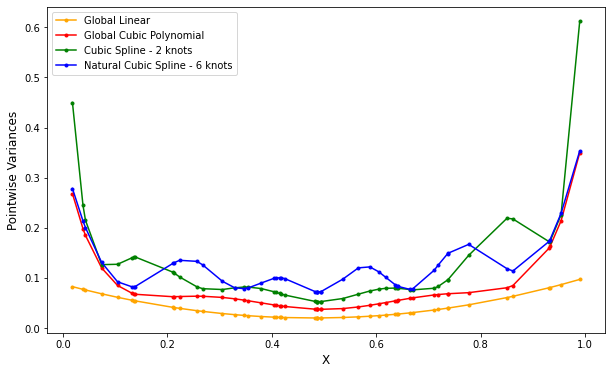

In [7]:
# Sample 50 points uniformly on [0, 1]
N = 50
X = np.random.uniform(low=0, high=1, size=(N,))
X = np.sort(X)

# Generate variance functions for each model
lin_var = gen_pointwise_variance(X, lin_basis_fun)
cubic_var = gen_pointwise_variance(X, cubic_basis_fun)
cubic_spl_var = gen_pointwise_variance(X, cubic_spl_basis_fun)
nat_cubic_spl_var = gen_pointwise_variance(X, nat_cubic_spl_basis_fun)

# Initialise plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot variance against X for each model
ax.plot(X, [lin_var(x) for x in X], marker='.', color='orange', label='Global Linear')
ax.plot(X, [cubic_var(x) for x in X], marker='.', color='red', label='Global Cubic Polynomial')
ax.plot(X, [cubic_spl_var(x) for x in X], marker='.', color='green', label='Cubic Spline - 2 knots')
ax.plot(X, [nat_cubic_spl_var(x) for x in X], marker='.', color='blue', label='Natural Cubic Spline - 6 knots')

# Axis labels
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Pointwise Variances', fontsize=12)

ax.legend();

## Exercise 5.4

Consider the truncated power series representation for cubic splines with $K$ interior knots. Let

\begin{equation}
    f(X) = \sum_{j=0}^3 \beta_j X^j + \sum_{k=1}^K \theta_k(X-\xi_k)_+^3.
\end{equation}

Prove that the natural boundary conditions for natural cubic splines (Section 5.2.1) imply the following linear constraints on the coefficients:

\begin{align}
    \beta_2 & = 0, & \sum_{k=1}^K \theta_k &= 0, \\
    \beta_3 & = 0, & \sum_{k=1}^K \xi_k\theta_k &= 0.
\end{align}

Hence derive the basis (5.4) and (5.5).

### Solution

The condition that $f(X)$ be linear for $X<\xi_1$ clearly implies that $\beta_2=\beta_3=0$. If this is the case then for $X>\xi_K$

\begin{equation}
    f(X) = \left(\sum_{k=1}^K \theta_k\right) X^3 + 3\left(\sum_{k=1}^K \xi_k \theta_k\right) X^2 + \text{lower order terms}.
\end{equation}

So for $f(X)$ to be linear for $X>\xi_K$ we need $\sum \theta_k = \sum \xi_k \theta_k = 0$.

Now let

\begin{equation}
    N_1(X)=1,\qquad N_2(X)=X,\qquad N_{k+2}(X)=d_k(X)-d_{K-1}(X),
\end{equation}

where

\begin{equation}
    d_k(X) = \frac{(X-\xi_k)_+^3 - (X-\xi_K)_+^3}{\xi_K - \xi_k}.
\end{equation}

First note that all of these are natural cubic splines: $N_{k+2}(X)$ has

\begin{equation}
    \sum_{k=1}^K \theta_k = \frac{1}{\xi_K - \xi_k} - \frac{1}{\xi_K - \xi_{K-1}} + \left(\frac{1}{\xi_K - \xi_{K-1}} - \frac{1}{\xi_K - \xi_k}\right) = 0
\end{equation}

and

\begin{align}
    \sum_{k=1}^K \xi_k \theta_k 
        & = \frac{\xi_k}{\xi_K - \xi_k} - \frac{\xi_{K-1}}{\xi_K - \xi_{K-1}} + \left(\frac{\xi_K}{\xi_K - \xi_{K-1}} - \frac{\xi_K}{\xi_K - \xi_k}\right) \\
        & = \frac{1}{(\xi_K - \xi_k)(\xi_K - \xi_{K-1})}\Big(\xi_k(\xi_K-\xi_{K-1}) - (\xi_K-\xi_k)\xi_{K-1} + \xi_K((\xi_K-\xi_k) - (\xi_K-\xi_{K-1}))\Big) \\
        & = 0.
\end{align}

Moreover, the $N_k(x)$ are clearly linearly independent for $k\leq K$ since they are linear combinations of the truncated power series basis and $N_{k+2}(x)$ is the only term for which $(X-\xi_k)_+^3$ has a non-zero coefficient.

Finally take a natural cubic spline $f(X)$ as above. We claim that

\begin{equation}
    f(X) = \beta_1N_1(X) + \beta_2N_2(X) + \sum_{k=1}^{K-2} (\xi_K - \xi_k)\theta_k N_{k+2}(X).
\end{equation}

It suffices to show that the coefficients of $(X-\xi_{K-1})_+^3$ and $(X-\xi_K)_+^3$ match up. The coefficient of $(X-\xi_{K-1})_+^3$ in the above expression is

\begin{align}
    -\sum_{k=1}^{K-2}\frac{\xi_K-\xi_k}{\xi_K-\xi_{K-1}}\theta_k
        & = \frac{1}{\xi_K-\xi_{K-1}}\left(-\xi_K\sum_{k=1}^{K-2}\theta_k + \sum_{k=1}^{K-2}\xi_k\theta_k\right) \\
        & = \frac{1}{\xi_K-\xi_{K-1}}\Big(\xi_K(\theta_{K-1}+\theta_K) - (\xi_{K-1}\theta_K + \xi_K\theta_K)\Big) \\
        & = \theta_{K-1}
\end{align}

and the coefficient of $(X-\xi_{K})_+^3$ is

\begin{equation}
    \sum_{k=1}^{K-2}(\xi_K - \xi_k)\left(\frac{1}{\xi_K-\xi_{K-1}} - \frac{1}{\xi_K-\xi_{k}}\right)\theta_k
        = \theta_{K-1} - \sum_{k=1}^{K-2}\theta_k
        = \theta_K.
\end{equation}

Thus the $N_k(x)$ for $1\leq k\leq K$ form a basis for the space of natural cubic splines.

## Exercise 5.5

Write a program to classify the phoneme data using a quadratic discriminant analysis (Section 4.3). Since there are many correlated features, you should filter them using a smooth basis of natural cubic splines (Section 5.2.3). Decide beforehand on a series of five different choices for the number and position of the knots, and use tenfold cross-validation to make the final selection. The phoneme data are available from the book website https://web.stanford.edu/~hastie/ElemStatLearn/.

### Solution

#### Data Processing

In [43]:
# Pydata stack
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Custom module for cubic splines
from cubspl import gen_nat_cubic_spl_basis_fun

# QDA model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

# Metrics
from sklearn.metrics import accuracy_score

# To apply data filter
from sklearn.preprocessing import FunctionTransformer

# Pipelines
from sklearn.pipeline import Pipeline

# For cross-validation
from sklearn.model_selection import GridSearchCV

We begin by importing and taking a look at the phoneme data set.

In [9]:
# Import data
df = pd.read_csv('phoneme-data.csv', skipinitialspace=True, header=0, index_col=0)

# Look at data
df.head()

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,...,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256,g,speaker
row.names,,,,,,,,,,,,,,,,,,,,,
1,9.85770,9.20711,9.81689,9.01692,9.05675,8.92518,11.28308,11.52980,10.79713,9.04747,...,12.68076,11.20767,13.69394,13.72055,12.16628,12.92489,12.51195,9.75527,sh,train.dr1.mcpm0.sa1
2,13.23079,14.19189,15.34428,18.11737,19.53875,18.32726,17.34169,17.16861,19.63557,20.15212,...,8.45714,8.77266,9.59717,8.45336,7.57730,5.38504,9.43063,8.59328,iy,train.dr1.mcpm0.sa1
3,10.81889,9.07615,9.77940,12.20135,12.59005,10.53364,8.54693,9.46049,11.96755,12.05282,...,5.00824,5.51019,5.95725,7.04992,7.02469,6.58416,6.27058,3.85042,dcl,train.dr1.mcpm0.sa1
4,10.53679,9.12147,10.84621,13.92331,13.52476,10.27831,8.97459,11.57109,12.35839,10.47826,...,5.85688,5.40324,6.07126,5.30651,4.27412,3.63384,3.22823,4.63123,dcl,train.dr1.mcpm0.sa1
5,12.96705,13.69454,14.91182,18.22292,18.45390,17.25760,17.79614,17.76387,18.99632,17.40394,...,8.00151,7.58624,6.65202,7.69109,6.93683,7.03600,7.01278,8.52197,aa,train.dr1.mcpm0.sa1


The data consists of 4509 observations of log-periodograms of different speech phonemes.

**Inputs:** `x.1,..,x.256` continuous numeric. Together they form the log-periodogram for frequencies from 1 to 256.

**Output:** `g` - phoneme, categorical. Values: `aa`, `ao`, `dcl`, `iy`, `sh`.

We also have a column `speaker` which identifies the speaker with a string consisting of four parts separated by periods, e.g. `train.dr1.mcpm0.sa1`. The first part is either `test` or `train`, the second is one of `dr1`,..,`dr8`, the third part is a 4 letter code followed by a number, and the final part is always `sa1`.

We will ignore the speaker information except to split the data into a training and test set.

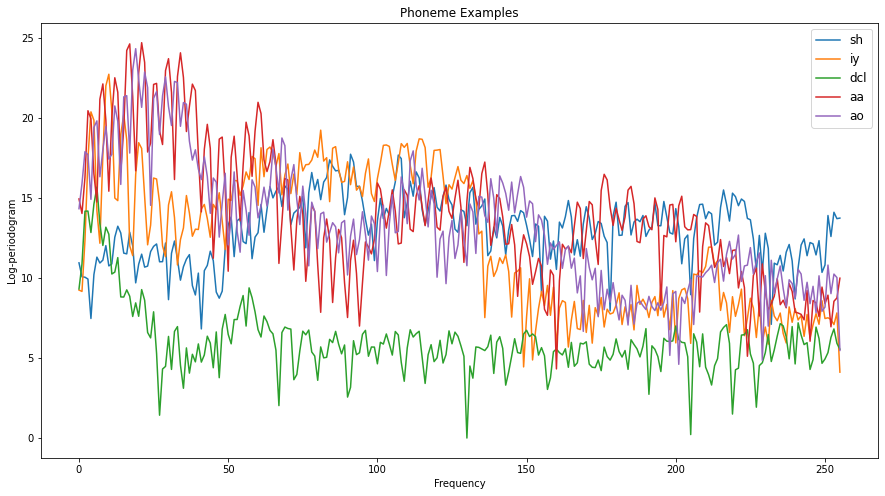

In [10]:
# Plot some sample periodograms
fig, ax = plt.subplots(figsize=(15, 8))

# Sample a log-periodograms for each phoneme
N = len(df)
phonemes = df.g.unique()

for phoneme in phonemes:
    sample = df[df.g == phoneme].sample(n=1)
    ax.plot(sample.iloc[0, :-2], label=phoneme)

# Plot parameters
ax.set_xticks(range(0, 256, 50))
ax.set_xticklabels(range(0, 256, 50))

ax.set_xlabel('Frequency')
ax.set_ylabel('Log-periodogram')

ax.set_title('Phoneme Examples')

ax.legend(fontsize=12);

We split the data into training and test sets and separate into inputs and outputs.

In [11]:
# Split into training and test
df['set'] = df.speaker.str.split('.', expand=True)[0]
train = df[df.set == 'train']
test = df[df.set == 'test']
df = df.drop(columns=['set'])

# Store useful constants
N = len(df)
N_train = len(train)
N_test = len(test)
p = 256

# Split into inputs and outputs
X_train = train.iloc[:, :p].to_numpy()
y_train = train.loc[:, 'g'].to_numpy()

X_test = test.iloc[:, :p].to_numpy()
y_test = test.loc[:, 'g'].to_numpy()

#### Model Specification

We will use two models: 'raw' quadratic discriminant analysis (QDA) on the features $x_1,\ldots,x_{256}$ and regularised QDA, implemented by filtering the features using a basis of natural cubic splines. In this section we fit both models and use 10-fold cross-validation to choose the position of the knots for the regularised QDA.

We begin by fitting the raw QDA model.

In [91]:
# Fit raw QDA
qda_raw = QDA()
qda_raw.fit(X_train, y_train);

# Calculate raw training error
y_train_est_raw = qda_raw.predict(X_train)
qda_raw_train_err = 1 - accuracy_score(y_train, y_train_est_raw)
print('Raw QDA training misclassification rate: {:.3f}'.format(qda_raw_train_err))

Raw QDA training misclassification rate: 0.000


Note that the misclassification rate is zero which suggests that we have severly overfit the training data.

To fit the regularised model we define functions to generate the basis matrix $\mathbf{H}$ and the filtering function $\mathbf{X} \to \mathbf{X}\mathbf{H}$ given a set of knots.

In [22]:
def gen_basis_matrix(knots, p=256):
    basis_fun = gen_nat_cubic_spl_basis_fun(knots=knots)
    basis_matrix = np.array([basis_fun(i) for i in range(1, p+1)])
    
    return basis_matrix

In [21]:
def gen_filter(basis_matrix):
    def data_filter(X):
        if X.ndim == 1:
            X = X[np.newaxis, :]
        
        return X @ basis_matrix
    
    return data_filter

Now we specify 5 sets of positions for the knots, fit a filtered QDA model for each, and examine the training and test error to choose the best configuration.

In [84]:
# Different positions to try for knots
num_knots = [6, 12, 24, 40, 60]
knot_positions = [np.linspace(1, 256, k, endpoint=False) + 255 / (2*k) for k in num_knots]

# Generate filter function for each set of knots
basis_matrices = [gen_basis_matrix(knots) for knots in knot_positions]
data_filters = [gen_filter(matrix) for matrix in basis_matrices]

# Create pipeline
estimators = [('filter', FunctionTransformer()),
             ('qda', QDA())]
pipe = Pipeline(estimators)

# Create GridSearch for CV
param_grid = {'filter__func' : data_filters}
qda_reg = GridSearchCV(pipe,
                       param_grid,
                       scoring='accuracy',
                       cv=10,
                       return_train_score=True,
                       refit=True)

# Fit to data
qda_reg.fit(X_train, y_train);

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('filter', FunctionTransformer()),
                                       ('qda',
                                        QuadraticDiscriminantAnalysis())]),
             param_grid={'filter__func': [<function gen_filter.<locals>.data_filter at 0x12f77d320>,
                                          <function gen_filter.<locals>.data_filter at 0x12f77d0e0>,
                                          <function gen_filter.<locals>.data_filter at 0x12f77d950>,
                                          <function gen_filter.<locals>.data_filter at 0x12f77da70>,
                                          <function gen_filter.<locals>.data_filter at 0x12f77d5f0>]},
             return_train_score=True, scoring='accuracy')

Compare the training and test error for different knot positions.

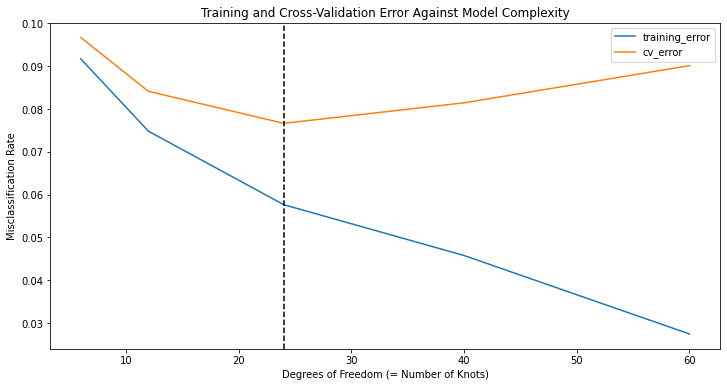

In [92]:
# Initialise figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot errors
ax.plot(num_knots, 1-qda_reg.cv_results_['mean_train_score'], label='training_error')
ax.plot(num_knots, 1-qda_reg.cv_results_['mean_test_score'], label='cv_error')

# Plot value that minimises cv error
ax.axvline(num_knots[qda_reg.best_index_], color='k', ls='--')

# Fig parameters
ax.set_title('Training and Cross-Validation Error Against Model Complexity')
ax.set_xlabel('Degrees of Freedom (= Number of Knots)')
ax.set_ylabel('Misclassification Rate')

ax.legend();

Cross-validation suggests that 24 equally spaced knots on $[1, 256]$ is the best out of the options tried.

#### Testing

Now we compare misclassification errors of the 'raw' QDA and the regularised one. 

In [89]:
# Calculate raw training error
y_train_est_raw = qda_raw.predict(X_train)
qda_raw_train_err = 1 - accuracy_score(y_train, y_train_est_raw)
print('Raw QDA training misclassification rate: {:.3f}'.format(qda_raw_train_err))

# Calculate regularised training error
y_train_est_reg = qda_reg.predict(X_train)
qda_reg_train_err = 1 - accuracy_score(y_train, y_train_est_reg)
print('Regularised QDA training misclassification rate: {:.3f} \n'.format(qda_reg_train_err))

# Calculate raw test error
y_test_est_raw = qda_raw.predict(X_test)
qda_raw_test_err = 1 - accuracy_score(y_test, y_test_est_raw)
print('Raw QDA test misclassification rate: {:.3f}'.format(qda_raw_test_err))

# Calculate regularised test error
y_test_est_reg = qda_reg.predict(X_test)
qda_reg_test_err = 1 - accuracy_score(y_test, y_test_est_reg)
print('Regularised QDA test misclassification rate: {:.3f}'.format(qda_reg_test_err))

Raw QDA training misclassification rate: 0.000
Regularised QDA training misclassification rate: 0.059 

Raw QDA test misclassification rate: 0.158
Regularised QDA test misclassification rate: 0.074


Smoothing enabled us to halve the misclassification rate.

## Exercise 5.6

Suppose you wish to fit a periodic function, with a known period $T$. Describe how you could modify the truncated power series basis to achieve this goal.

## Exercise 5.7

Derivation of smoothing splines (Green and Silverman, 1994). Suppose that $N \geq 2$, and that $g$ is the natural cubic spline interpolant to the pairs $\{x_i, z_i\}_1^N$, with $a < x_1 < \cdots < x_N < b$. This is a natural spline with a knot at every $x_i$; being an $N$-dimensional space of functions, we can determine the coefficients such that it interpolates the sequence $z_i$ exactly. Let $\tilde{g}$ be any other differentiable function on $[a, b]$ that interpolates the $N$ pairs.

**(a)** Let $h(x)=\tilde{g}(x)-g(x)$. Use integration by parts and the fact that g is a natural cubic spline to show that

\begin{align}
    \int_a^b g^{\prime\prime}(x)h^{\prime\prime}(x) \,\mathrm{d}x
        & = -\sum_{j=1}^{N-1} g^{\prime\prime\prime}(x_j^+)\{ h(x_{j+1})-h(x_j)\} \\
        & = 0.
\end{align}

**(b)** Hence show that

\begin{equation}
    \int_a^b \tilde{g}^{\prime\prime}(t)^2 \,\mathrm{d}t
        \geq \int_a^b g^{\prime\prime}(t)^2 \,\mathrm{d}t,
\end{equation}

and that equality can only hold if $h$ is identically zero on $[a, b]$.

**(c)** Consider the penalized least squares problem

\begin{equation}
    \underset{f}{\text{min}} \left[\sum_{i=1}^N (y_i-f(x_i))^2 + \lambda \int_a^b f^{\prime\prime}(t)^2 \,\mathrm{d}t\right].
\end{equation}

Use (b) to argue that the minimizer must be a cubic spline with knots at each of the $x_i$.

### Solution

**(a)** Write $x_0=a$ and $x_{N+1}=b$ for notational convenience. By integration by parts,

\begin{align}
    \int_a^b g^{\prime\prime}(x)h^{\prime\prime}(x) \,\mathrm{d}x
        & = \sum_{j=0}^N \int_{x_j}^{x_{j+1}} g^{\prime\prime}(x)h^{\prime\prime}(x) \,\mathrm{d}x \\
        & = \sum_{j=0}^N \left(\left[g^{\prime\prime}(x)h^{\prime}(x)\right]_{x_j}^{x_{j+1}} - \int_{x_j}^{x_{j+1}} g^{\prime\prime\prime}(x)h^{\prime\prime}(x) \,\mathrm{d}x\right) \\
        & = \left(g^{\prime\prime}(b)h^{\prime}(b) -  g^{\prime\prime}(a)h^{\prime}(a)\right) - \sum_{j=0}^N \left(\int_{x_j}^{x_{j+1}} g^{\prime\prime\prime}(x)h^{\prime\prime}(x) \,\mathrm{d}x\right). \\
\end{align}

Since $g(x)$ is a cubic spline, $g^{\prime\prime\prime}(x)$ is piecewise constant and is equal to $g^{\prime\prime\prime}(x_j^+)$ for all $x\in (x_j, x_{j+1})$, where $x_j^+=x_j+\varepsilon$ for some suitably small $\varepsilon$. Moreover, since $g(x)$ is natural, $g^{\prime\prime}(a)=g^{\prime\prime}(b)=g^{\prime\prime\prime}(x_0^+)=g^{\prime\prime\prime}(x_N^+)=0$ and thus

\begin{equation}
    \int_a^b g^{\prime\prime}(x)h^{\prime\prime}(x) \,\mathrm{d}x 
        =-\sum_{j=1}^{N-1} g^{\prime\prime\prime}(x_j^+)\left[h^{\prime\prime}(x)\right]_{x_j}^{x_{j+1}}
        =-\sum_{j=1}^{N-1} g^{\prime\prime\prime}(x_j^+)\left(h^{\prime\prime}(x_{j+1})-h^{\prime\prime}(x_{j})\right)
        =0,
\end{equation}

as $h(x_j)=\tilde{g}(x_j) - g(x_j)=0$.

**(b)** Part (a) implies that

\begin{equation}
    0 = \int_a^b g^{\prime\prime}(t)h^{\prime\prime}(t) \,\mathrm{d}t
        = \int_a^b g^{\prime\prime}(t)\tilde{g}^{\prime\prime}(t) \,\mathrm{d}t - \int_a^b g^{\prime\prime}(t)^2 \,\mathrm{d}t \\
    \Rightarrow \int_a^b g^{\prime\prime}(t)\tilde{g}^{\prime\prime}(t) \,\mathrm{d}t = \int_a^b g^{\prime\prime}(t)^2 \,\mathrm{d}t.
\end{equation}

Moreover,

\begin{align}
    0 \leq \int_a^b h^{\prime\prime}(t)^2 \,\mathrm{d}t
        & = \int_a^b \tilde{g}^{\prime\prime}(t)h^{\prime\prime}(t) \,\mathrm{d}t - \int_a^b g^{\prime\prime}(t) h^{\prime\prime}(t) \,\mathrm{d}t \\
        & = \int_a^b \tilde{g}^{\prime\prime}(t)h^{\prime\prime}(t) \,\mathrm{d}t \\
        & = \int_a^b \tilde{g}^{\prime\prime}(t)^2 \,\mathrm{d}t - \int_a^b \tilde{g}^{\prime\prime}(t) g^{\prime\prime}(t) \,\mathrm{d}t
\end{align}

with equality if and only iff $h\equiv 0$ on $[a, b]$. Combining these two pieces yields the result.

**(c)** Let $RSS(f)$ denote the expression to be minimized and let $f$ be a minimizer. Define $z_i=f(x_i)$ for all $i$ and let $g$ denote the unique natural cubic spline with $g(x_i)=z_i$ for all $i$. By minimality of $f$, $RSS(f)\leq RSS(g)$. But by part (b)

\begin{equation}
    \int_a^b g^{\prime\prime}(t)^2 \,\mathrm{d}t \leq \int_a^b f^{\prime\prime}(t)^2 \,\mathrm{d}t,
\end{equation}

so $RSS(g)\leq RSS(f)$, as $f(x_i)=g(x_i)$ for all $i$. So $RSS(g)=RSS(f)$ and the inequality above is an equality. Part (b) now implies that $f\equiv g$ on $[a, b]$ and so $f$ is a natural cubic spline with knots at the $x_i$.

## Exercise 5.8

**TODO**

## Exercise 5.9

Derive the Reinsche form $\mathbf{S}_{\lambda} = (\mathbf{I}+\lambda\mathbf{K})^{-1}$ for the smoothing spline.

### Solution

Since $\mathbf{N}$ has rank $N$ it is invertible and 

\begin{align}
    \mathbf{S}_{\lambda} 
        & = \mathbf{N}\left(\mathbf{N}^T\mathbf{N} + \lambda\Omega_N\right)^{-1} \mathbf{N}^T \\
        & = \mathbf{N}\Big(\mathbf{N}^T\big(\mathbf{I} + \lambda(\mathbf{N}^{-1})^T\Omega_N\mathbf{N}^{-1}\big)\mathbf{N}\Big)^{-1} \mathbf{N}^T \\
        & = \Big(\mathbf{I} + \lambda (\mathbf{N}^{-1})^T\Omega_N\mathbf{N}^{-1}\Big)^{-1}.
\end{align}

So just take $\mathbf{K}=(\mathbf{N}^{-1})^T\Omega_N\mathbf{N}^{-1}$.

## Exercise 5.11

Prove that for a smoothing spline the null space of $\mathbf{K}$ is spanned by functions linear in $X$.

 ### Solution
 
Suppose that $\mathbf{u}=(u_1,\ldots ,u_N)$ lies in the null space of $\mathbf{K}$. Since the space of natural cubic splines is $N$-dimensional, we can find one that interpolates the pairs $\{(x_i, u_i)\}_{i=1}^N$. That is, there exists $\beta=(\beta_1,\ldots,\beta_N)$ such that $\mathbf{u}_i=\sum_{j=1} \beta_j N_j(x_i) \Rightarrow \mathbf{u}=\mathbf{N}\beta$. We can also think of $\mathbf{u}$ as the evaluation of the function $u(X)=\sum_{j=1}^N \beta_k N_j(X)$ at $x_1,\ldots ,x_N$.

From Exercise 5.11, $\mathbf{K}=(\mathbf{N}^{-1})^T\Omega_N\mathbf{N}^{-1}$. Since $\mathbf{u}$ is in the null space,

\begin{equation}
    0 = \mathbf{K}\mathbf{u} = \mathbf{K}\mathbf{N}\beta \qquad\Rightarrow\qquad \Omega_N\beta = 0.
\end{equation}

From the definition, the $j$th entry of $\Omega_N\beta$ is

\begin{equation}
    \sum_{k=1}^N \Omega_{jk}\beta_k = \int_{\mathbb{R}} \sum_{k=1}^N \beta_k N_j^{\prime\prime}(t)N_k^{\prime\prime}(t) \,\mathrm{d}t = \int_{\mathbb{R}} N_j^{\prime\prime}(t)u^{\prime\prime}(t) \,\mathrm{d}t.
\end{equation}

Since this is zero for all $j$, $\int_{\mathbb{R}} s^{\prime\prime}(t)u^{\prime\prime}(t) \,\mathrm{d}t=0$ for any natural cubic spline $s(t)$. In particular this is true for $s(t)=u(t)$, so $u^{\prime\prime}(t)$ is identically zero. Thus $u(t)$ is linear.